<a href="https://colab.research.google.com/github/COMP90054/2024-S2-tutorials/blob/main/solution_set_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP90054 AI Planning for Autonomy
### Problem Set 09 Solution
 - Monte-Carlo tree search




## Problem 1

The expansion of the tree is illustrated over the five iterations:

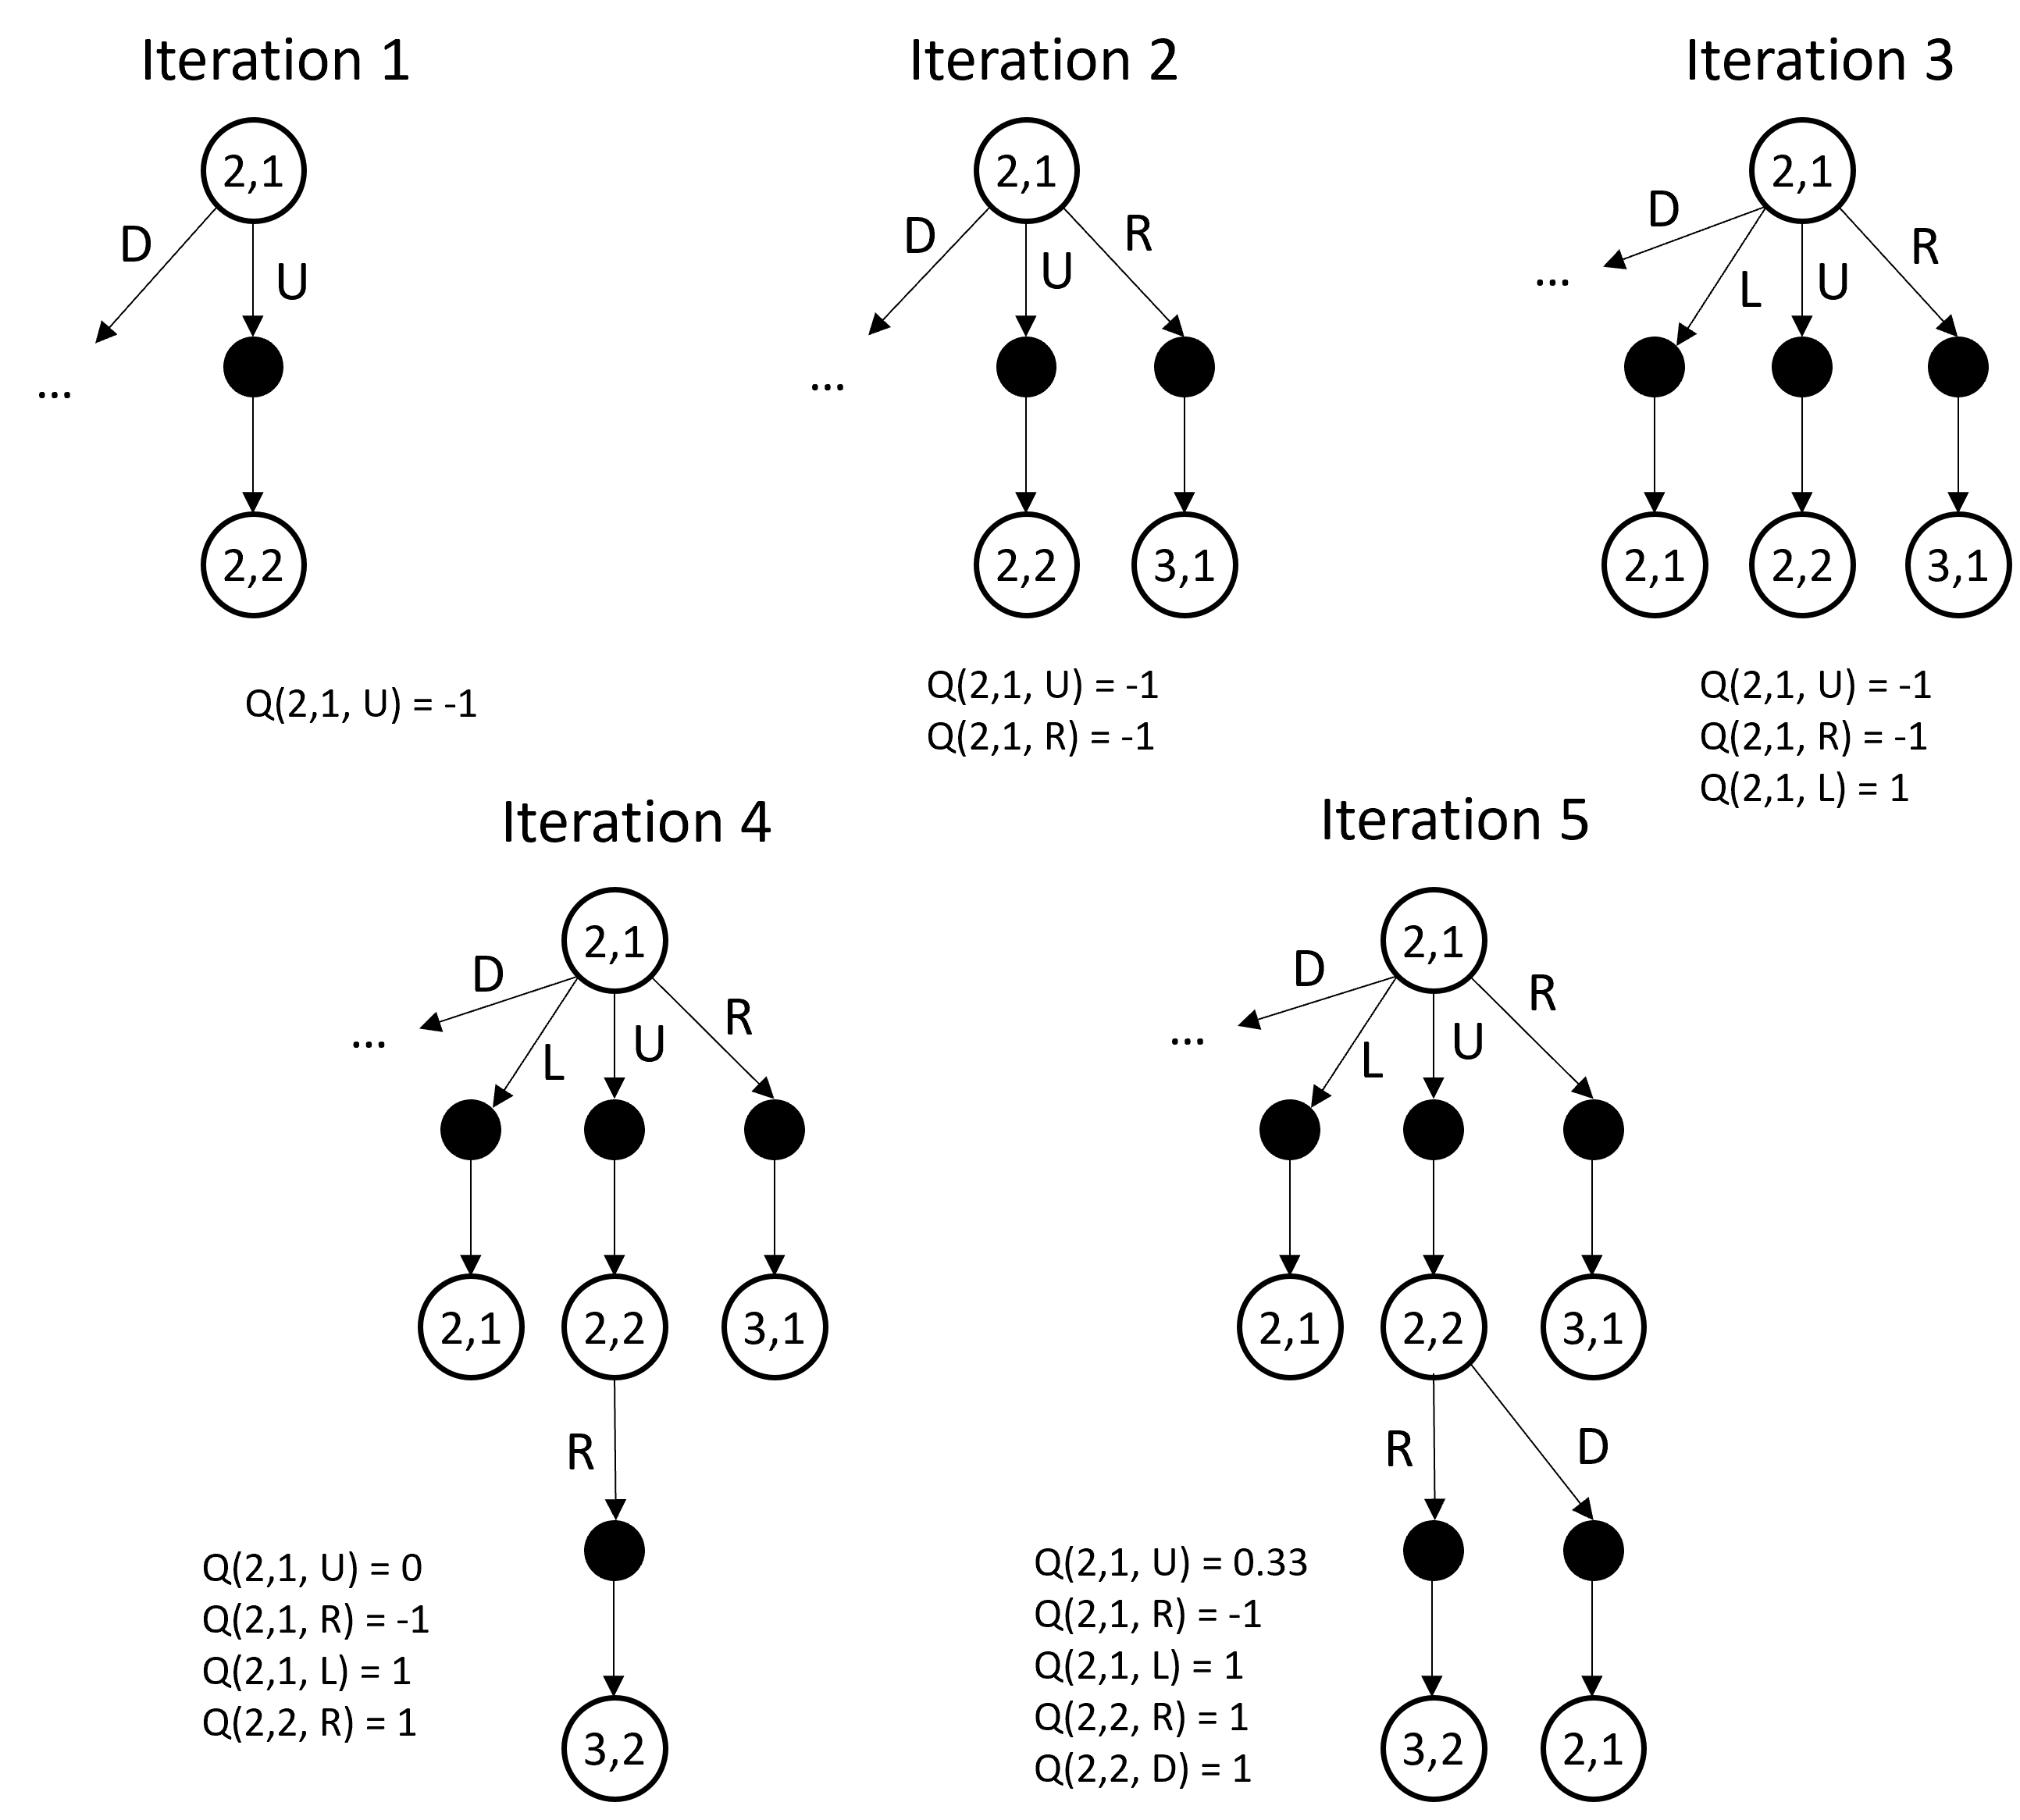

The process followed for the five iterations are:

1. Select $(2,1)$; Expand $Up$; Do simulation from $(2,2)$; Backpropagate the reward $-1$ to $Q(2,1, Up)$. Because this is the first time the pair $(2,1), Up$ has been visited, $Q(2,1, Up) = -1$.

2. Select $(2,1)$; Expand $Right$; Simulate from $(3,1)$; Backpropagate the reward $-1$. Because this is the first time the pair $(2,1), Right$ has been visited, $Q(2,1, Right) = -1$.

3. Select $(2,1)$; Expand $Left$; Simulate from $(2,1$); Backpropagate the reward $1$.  Because this is the first time the pair $(2,1), Left$ has been visited, $Q(2,1, Left) = 1$.

4. Select $(2,1)$; the node is fully expanded, so recursively Select $Up$ using a multi-armed bandit algorithm; Expand $Right$; Simulate from $(3,2)$; Backpropagate the reward $1$. This is the first time the pair $(2,2), Right$ has been visited, $Q(2,2, Right) = 1$. This is the 2nd time the pair $(2,1), Up$ has been visited, so:

$$
\begin{array}{lll}
    Q(2,1, Up) & = & Q(2,1, Up) + \frac{1}{N(2,1, Up)}[r + \gamma G - Q(2,1, Up)] \\
              & = &  -1        + \frac{1}{2}[0 + 1\cdot 1 - (-1)]\\
              & = & 0
\end{array}
$$

5. Select $(2,1)$; the node is fully expanded, so recursively Select $Up$ using a multi-armed bandit algorithm; Expand $Down$; Simulate from $(2,1)$; Backpropagate the reward $1$. The backpropagation for $Q(2,2, Down)$ is straightforward. For $Q(2,1, Up)$, this is the 3rd time the pair has been visited, so:

$$
\begin{array}{lll}
    Q(2,1, Up) & = & Q(2,1, Up) + \frac{1}{N(2,1, Up)}[r + \gamma G - Q(2,1, Up)] \\
              & = &  0        + \frac{1}{3}[0 + 1\cdot 1 - 0]\\
              & = & 0.33
\end{array}
$$



## Problem 2

This is straightforwad. The Q-values are:

$$\begin{array}{lll}
  Q((2,1), Up)     & = & 0.33\\
  Q((2,1), Right)  & = & -1\\
  Q((2,1), Left)   & = & 1\\
  Q((2,1), Down)   & = & -1
\end{array}
$$

Therefore, we would select $Left$.

## Problem 3

We need to calculate $\pi$ for each of the actions based on the UCT formula and then normalise. The UCT formula is:

$$\text{argmax}_{a \in A(s)} Q(s,a) + 2 C_p \sqrt{\frac{2 \ln N(s)}{N(s,a)}}$$

Let's calculate this for each of the actions:

$$\begin{aligned}
                \pi(s)\ =\ argmax_{a\in A(s)}
                \begin{pmatrix}
                Up & : & 0.33+ \sqrt{\frac{2\ln{6}}{3}}\\
                Right & : & -1 + \sqrt{\frac{2\ln{6}}{1}}\\
                Left & : & 1 + \sqrt{\frac{2\ln{6}}{1}}\\
                Down & : & -1 + \sqrt{\frac{2\ln{6}}{1}}\\
                \end{pmatrix}
\end{aligned}$$

Thus we end up with:

$$\begin{aligned}
                \pi(s)\ =\ argmax_{a\in A(s)}
                \begin{pmatrix}
                Up & : & 0.33+ 1.09 = 1.42\\
                Right & : & -1 + 1.89 = 0.89\\
                Left & : & 1 + 1.89 = 2.89\\
                Down & : & -1 + 1.89 = 0.89\\
                \end{pmatrix}
\end{aligned}$$

Therefore, UCT would be more likely to choose $Left$.